# 5. Join application_{train|test}.csv with transactional data

## 5.1 Importing Libraries + Reading in Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the train dataset
app_train = pd.read_csv("application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# reading in the 'Bureau' dataset 
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


## 5.2 Observing the Bureau Dataset

In [7]:
# There are 1716428 rows and 17 columns
print(bureau.shape)


(1716428, 17)


In [8]:
# Information about the data types of the columns
print(bureau.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


In [9]:
# Descriptive statistics of the numeric columns
print(bureau.describe())

         SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+0

In [11]:
# Displaying the number of missing values in each column
print(bureau.isnull().sum())

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


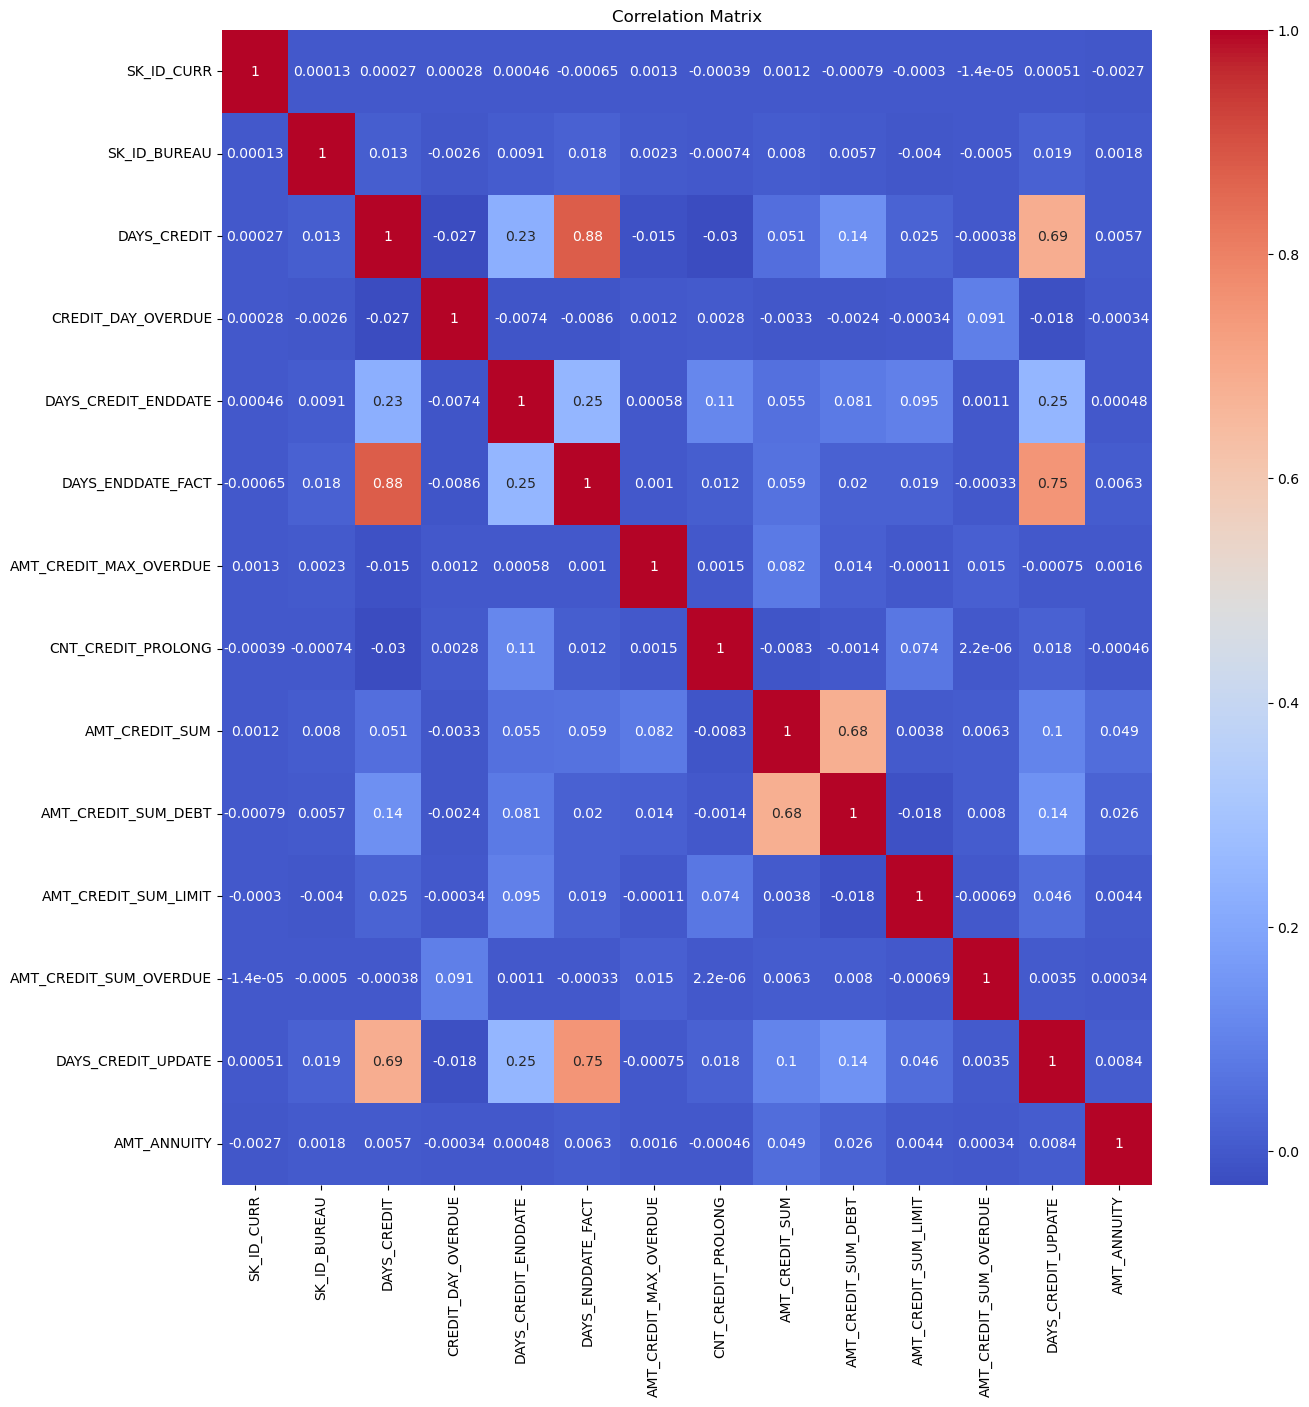

In [26]:
# Displaying a heatmap of the correlation matrix
correlation_matrix = bureau.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5.3 Joining Bureau Data with Train Data

In [4]:
# Joining the data
app_train_bureau = app_train.merge(bureau, on='SK_ID_CURR', how='left')

# Displaying the first 5 rows
app_train_bureau.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0.0,0.0,0.0,NaN,0.0,Credit card,-47.0,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0.0,135000.0,0.0,0.0,0.0,Consumer credit,-1185.0,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0.0,19071.0,NaN,NaN,0.0,Consumer credit,-906.0,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0.0,120735.0,0.0,0.0,0.0,Consumer credit,-34.0,0.0


# 6 Exploring The Joined Transactional Data

## 6.1 Shape of New Dataframe

In [31]:
# There are 1509345 rows and 138 columns 
print(app_train_bureau.shape)

(1509345, 138)


##  6.2 Observing Numerical Columns

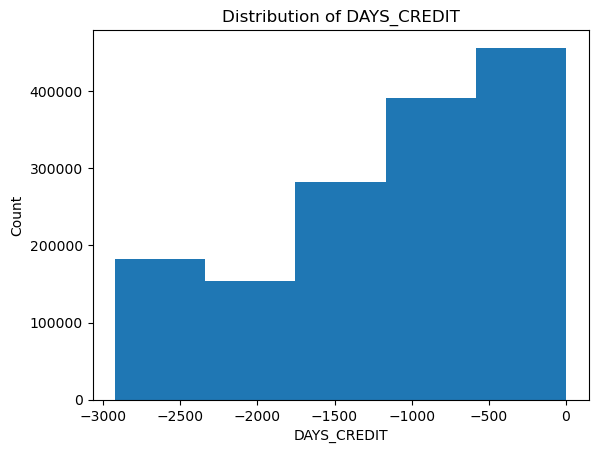

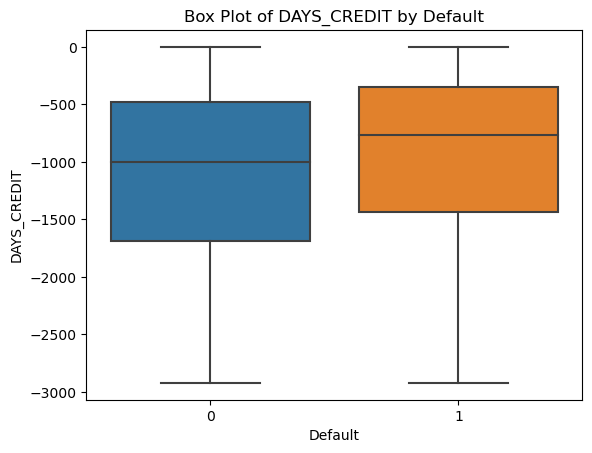

            count         mean         std     min     25%     50%    75%  max
TARGET                                                                        
0       1350805.0 -1157.939253  800.763592 -2922.0 -1692.0 -1004.0 -483.0  0.0
1        114520.0  -974.468591  771.341078 -2922.0 -1433.0  -764.5 -345.0 -1.0


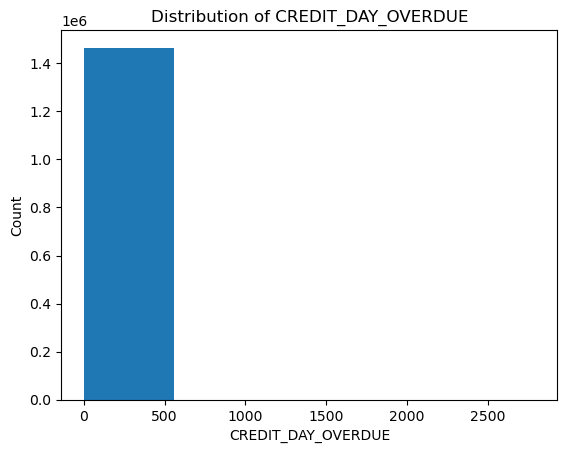

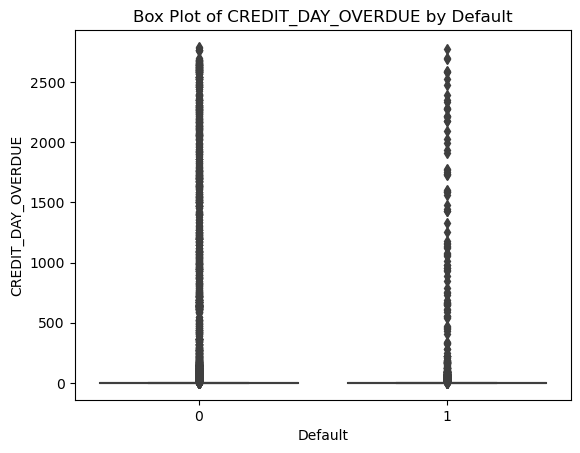

            count      mean        std  min  25%  50%  75%     max
TARGET                                                            
0       1350805.0  0.859229  37.874248  0.0  0.0  0.0  0.0  2792.0
1        114520.0  1.237103  42.396602  0.0  0.0  0.0  0.0  2776.0


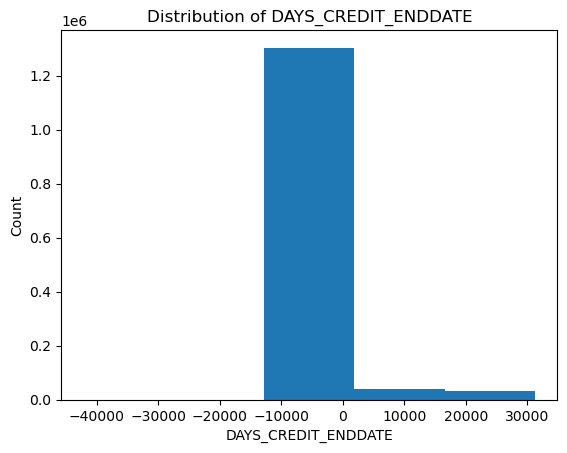

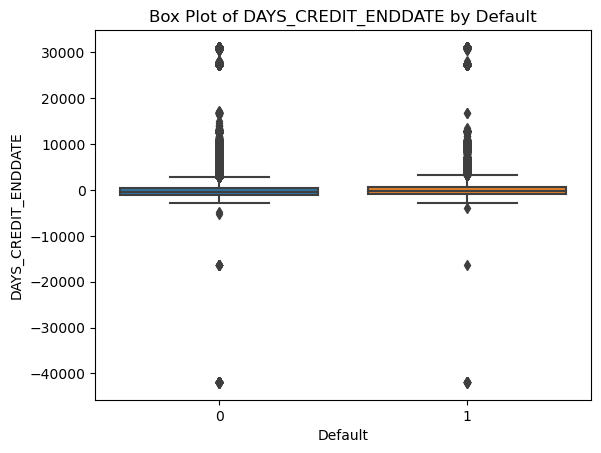

            count        mean          std      min     25%    50%    75%  \
TARGET                                                                      
0       1271015.0  455.282841  4897.297009 -42056.0 -1162.0 -353.0  446.0   
1        105212.0  950.371840  5699.043528 -42060.0  -910.0 -120.0  735.0   

            max  
TARGET           
0       31199.0  
1       31198.0  


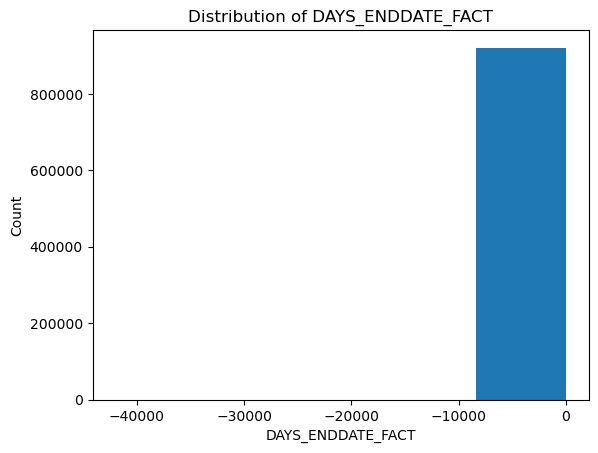

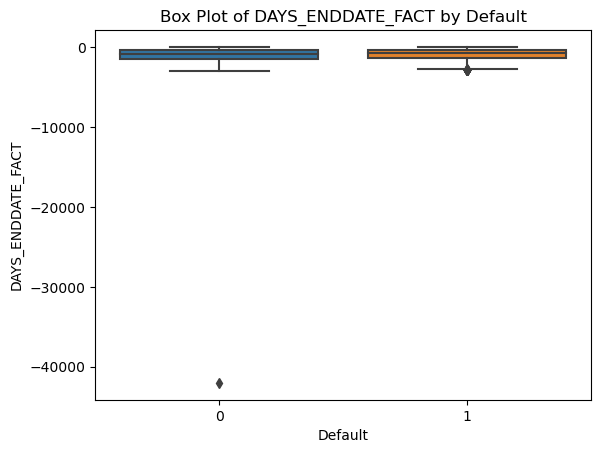

           count         mean         std      min      25%    50%    75%  max
TARGET                                                                        
0       856756.0 -1030.427522  719.217876 -42023.0 -1514.00 -908.0 -434.0  0.0
1        63896.0  -920.025416  698.865466  -2917.0 -1335.25 -767.0 -345.0  0.0


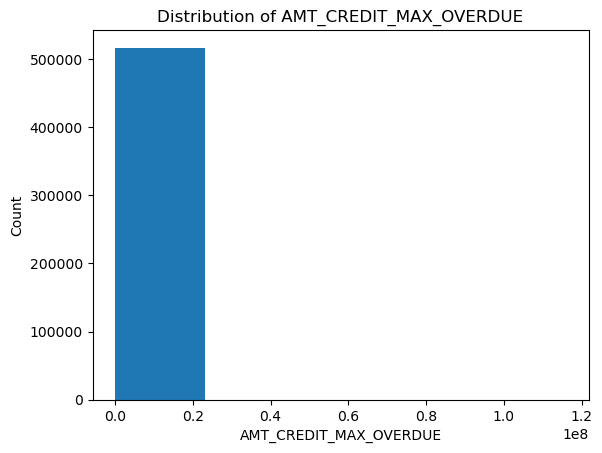

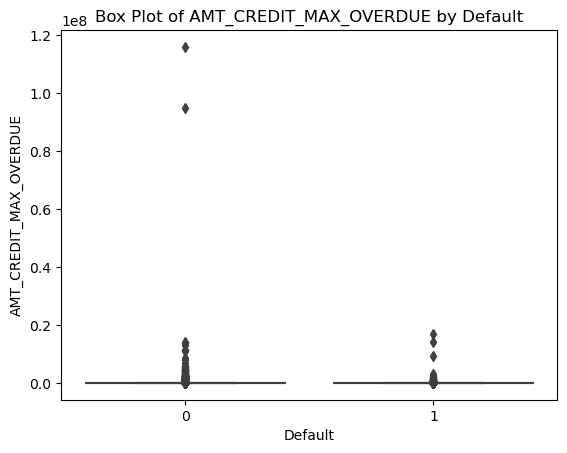

           count         mean            std  min  25%  50%       75%  \
TARGET                                                                  
0       475496.0  3840.144965  226148.894461  0.0  0.0  0.0   0.00000   
1        41284.0  5125.800763  122767.985152  0.0  0.0  0.0  35.29125   

                max  
TARGET               
0       115987185.0  
1        16950010.5  


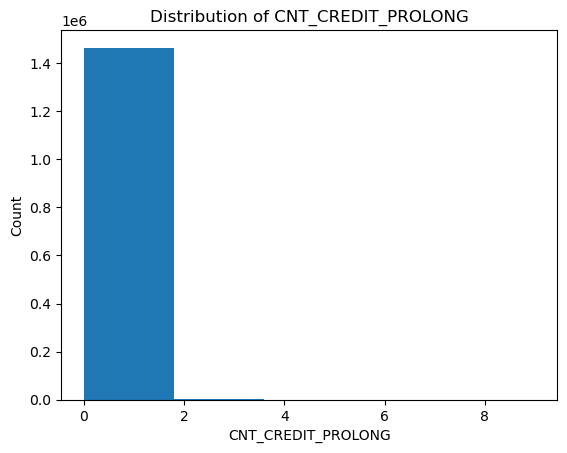

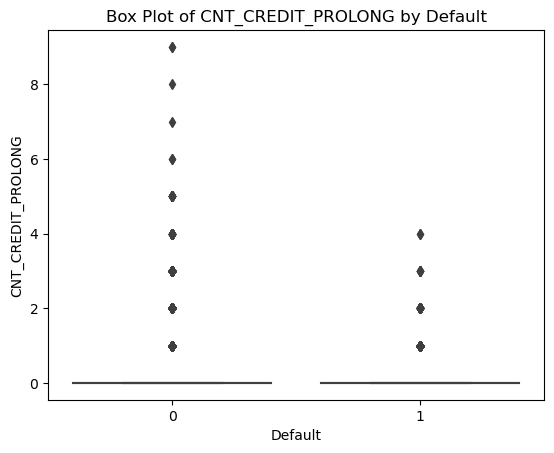

            count      mean       std  min  25%  50%  75%  max
TARGET                                                        
0       1350805.0  0.007233  0.102794  0.0  0.0  0.0  0.0  9.0
1        114520.0  0.007815  0.100818  0.0  0.0  0.0  0.0  4.0


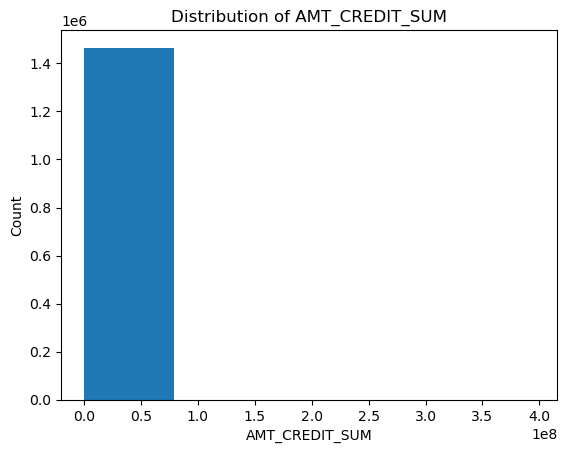

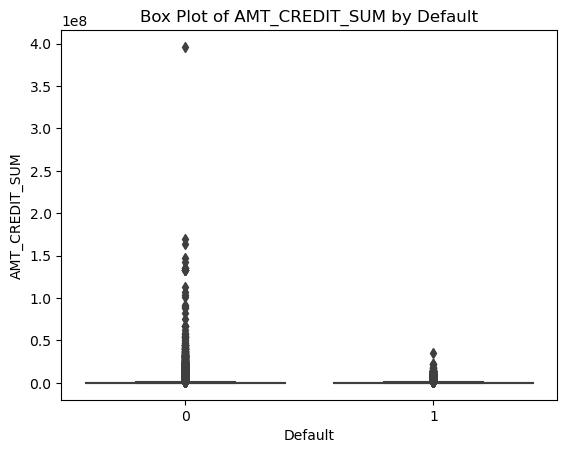

            count           mean           std  min       25%          50%  \
TARGET                                                                       
0       1350802.0  355017.990578  1.104648e+06  0.0  51660.00  125206.4025   
1        114520.0  312420.725270  6.889266e+05  0.0  45764.19  119880.0000   

               75%          max  
TARGET                           
0       309237.750  396000000.0  
1       299622.375   35190000.0  


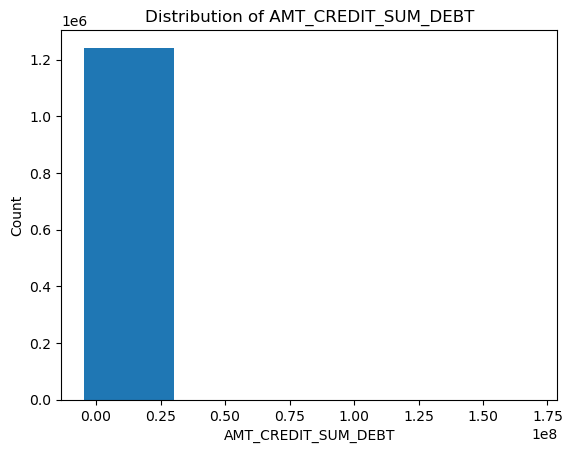

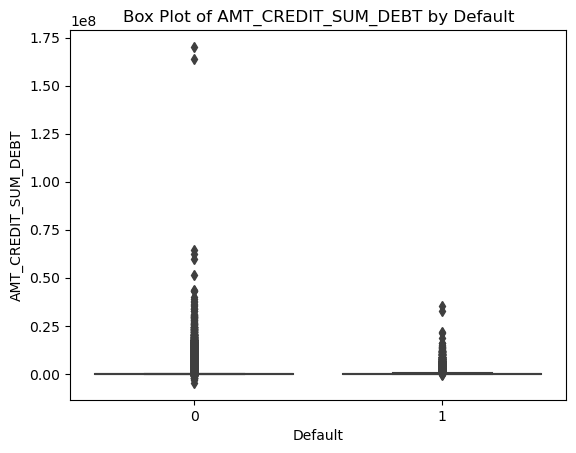

            count           mean            std         min  25%  50%  \
TARGET                                                                  
0       1144386.0  135387.362367  686127.228879 -4705600.32  0.0  0.0   
1         97845.0  141756.601776  538380.247953  -414000.00  0.0  0.0   

            75%          max  
TARGET                        
0       34812.0  170100000.0  
1       86157.0   35108518.5  


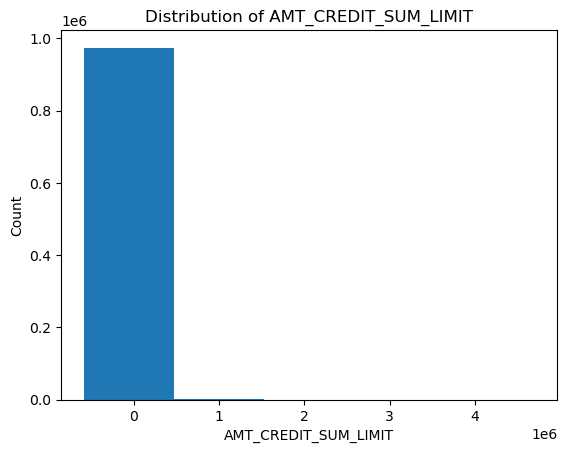

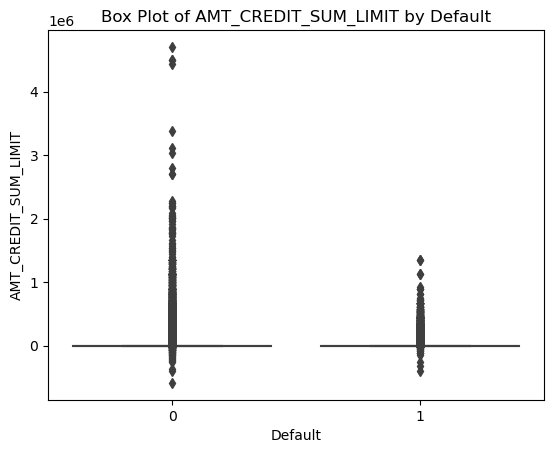

           count         mean           std         min  25%  50%  75%  \
TARGET                                                                   
0       899469.0  6442.901421  46083.332445 -586406.115  0.0  0.0  0.0   
1        76186.0  5428.470023  36982.751089 -401346.945  0.0  0.0  0.0   

               max  
TARGET              
0       4705600.32  
1       1350000.00  


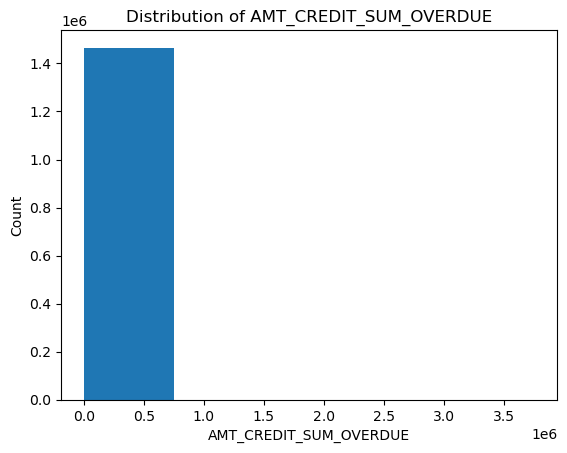

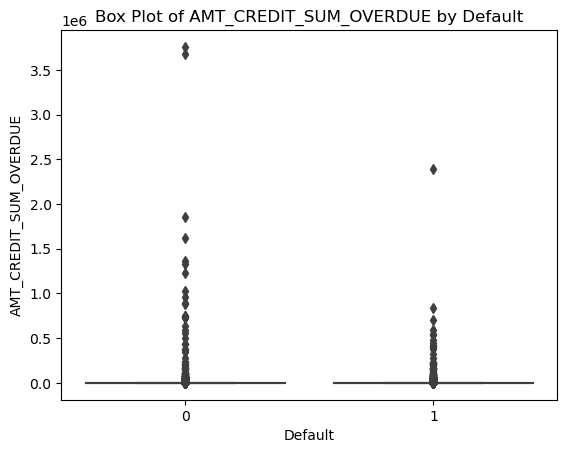

            count        mean          std  min  25%  50%  75%        max
TARGET                                                                   
0       1350805.0   28.682461  5934.185099  0.0  0.0  0.0  0.0  3756681.0
1        114520.0  174.843954  9392.520309  0.0  0.0  0.0  0.0  2387232.0


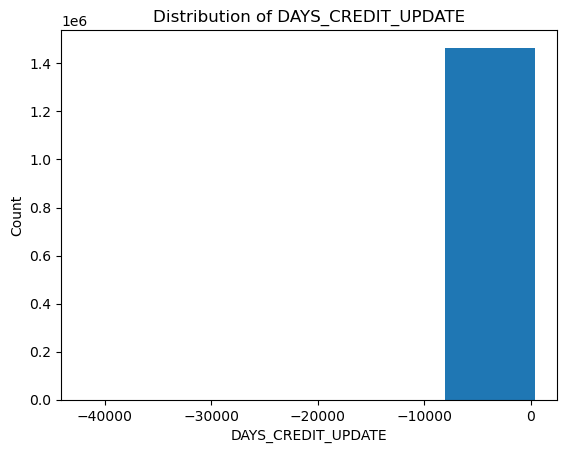

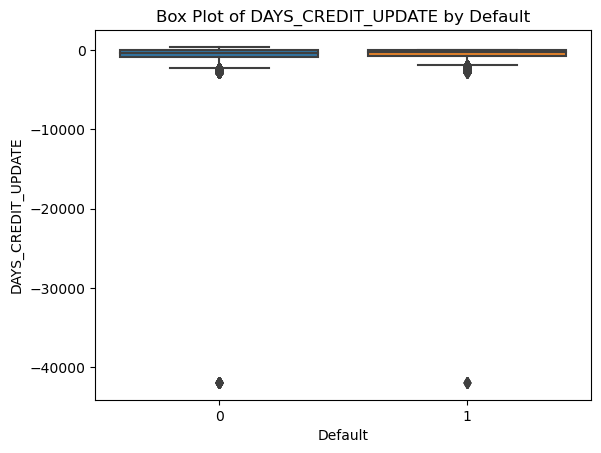

            count        mean         std      min    25%    50%   75%    max
TARGET                                                                       
0       1350805.0 -608.602741  735.055632 -41947.0 -914.0 -421.0 -35.0  372.0
1        114520.0 -495.800943  753.066938 -41933.0 -764.0 -229.0 -24.0   22.0


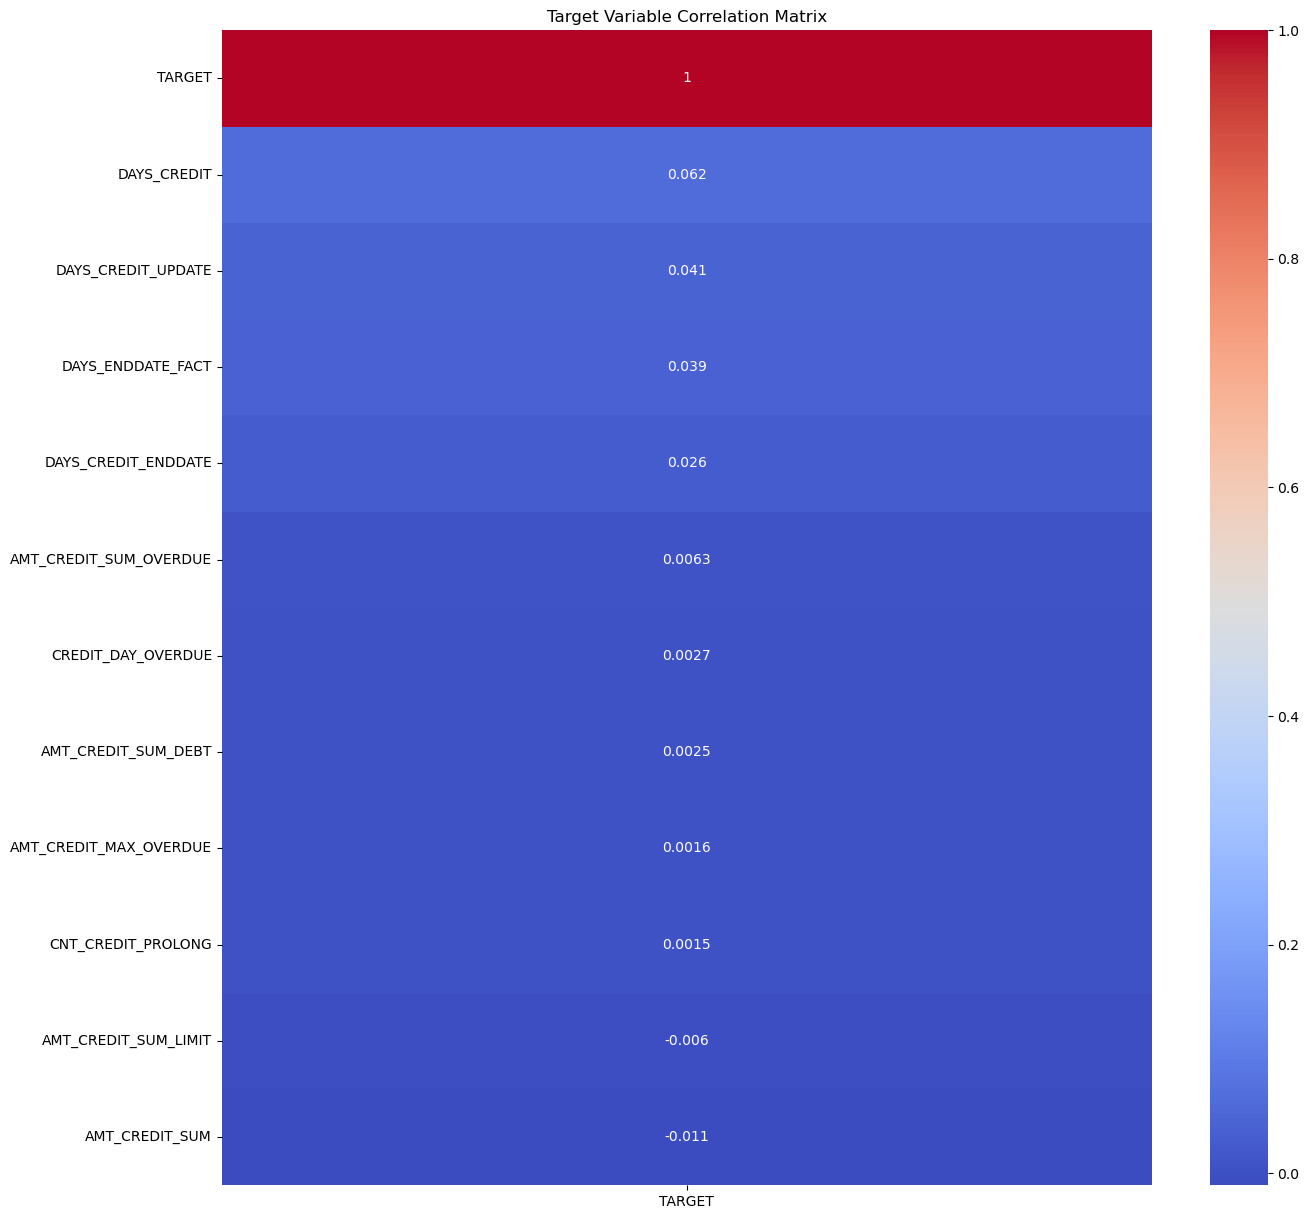

In [5]:
# Analyze numerical columns
numerical_columns = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
                    'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 
                     'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
                    'DAYS_CREDIT_UPDATE']

for column in numerical_columns:
    # Plot histogram
    plt.hist(app_train_bureau[column], bins=5)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

    # Box plot
    sns.boxplot(x='TARGET', y=column, data=app_train_bureau)
    plt.xlabel('Default')
    plt.ylabel(column)
    plt.title(f'Box Plot of {column} by Default')
    plt.show()

    # Summary statistics
    stats_by_default = app_train_bureau.groupby('TARGET')[column].describe()
    print(stats_by_default)

# Investigate correlations
correlation_matrix = app_train_bureau[numerical_columns + ['TARGET']].corr()
target_correlation_matrix = correlation_matrix['TARGET']
sorted_correlation = target_correlation_matrix.sort_values(ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(sorted_correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Target Variable Correlation Matrix')
plt.show()

## 6.3 Observing Categorical Columns

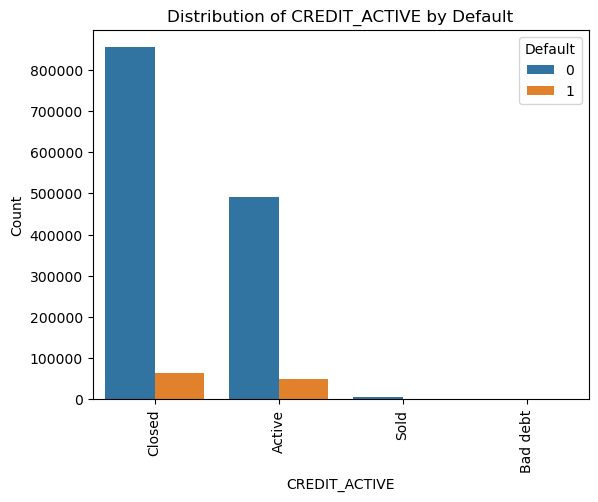

CREDIT_ACTIVE
Active       9.288473
Bad debt    20.000000
Closed       6.931101
Sold        10.100831
Name: TARGET, dtype: float64


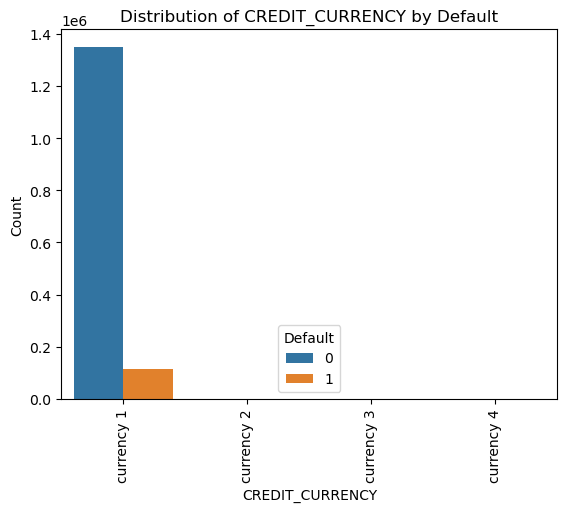

CREDIT_CURRENCY
currency 1     7.817394
currency 2     4.570896
currency 3    11.333333
currency 4     0.000000
Name: TARGET, dtype: float64


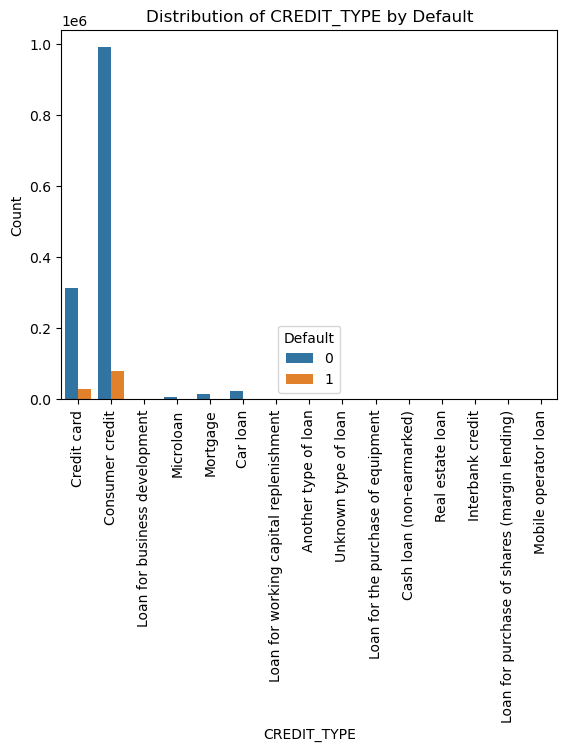

CREDIT_TYPE
Another type of loan                             7.142857
Car loan                                         5.573094
Cash loan (non-earmarked)                        4.347826
Consumer credit                                  7.483662
Credit card                                      8.800854
Interbank credit                                 0.000000
Loan for business development                    6.159210
Loan for purchase of shares (margin lending)     0.000000
Loan for the purchase of equipment              23.529412
Loan for working capital replenishment          12.732095
Microloan                                       20.644087
Mobile operator loan                             0.000000
Mortgage                                         4.997757
Real estate loan                                 0.000000
Unknown type of loan                             6.144068
Name: TARGET, dtype: float64


In [43]:
# Visualize categorical columns
categorical_columns = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

for column in categorical_columns:
    # Bar plot
    sns.countplot(x=column, hue='TARGET', data=app_train_bureau)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column} by Default')
    plt.xticks(rotation=90)
    plt.legend(title='Default')
    plt.show()

    # Percentage of defaults within each category
    defaults_by_category = app_train_bureau.groupby(column)['TARGET'].mean() * 100
    print(defaults_by_category)

